In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [4]:
!pip install nltk

In [43]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
df = pd.read_csv('./covid-19_vaccine_tweets_with_sentiment.csv')
df.head()

,tweet_id,label,tweet_text
0,1.360340e+18,1,"4,000 a day dying from the so called Covid-19 ..."
1,1.382900e+18,2,Pranam message for today manifested in Dhyan b...
2,1.375670e+18,2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,1.381310e+18,1,"Confirmation that Chinese #vaccines ""don’t hav..."
4,1.362170e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines..."


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    6000 non-null   float64
 1   label       6000 non-null   int64  
 2   tweet_text  6000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 140.8+ KB


In [46]:
df.shape

(6000, 3)

In [47]:
df.describe

<bound method NDFrame.describe of           tweet_id  label                                         tweet_text
0     1.360340e+18      1  4,000 a day dying from the so called Covid-19 ...
1     1.382900e+18      2  Pranam message for today manifested in Dhyan b...
2     1.375670e+18      2  Hyderabad-based ?@BharatBiotech? has sought fu...
3     1.381310e+18      1  Confirmation that Chinese #vaccines "don’t hav...
4     1.362170e+18      3  Lab studies suggest #Pfizer, #Moderna vaccines...
...            ...    ...                                                ...
5995  1.370980e+18      2  @Swamy39 Dr. @Swamy39 jee :\n\nMany people lik...
5996  1.379830e+18      3  So happy to be fully vaccinated against COVID-...
5997  1.384790e+18      2  Serum Institute of India announces cost of Cov...
5998  1.382360e+18      1  @___batshitcrazy @BarrowfordHead @Bectully I h...
5999  1.380050e+18      2  The smart sympathy attends into the oblong not...

[6000 rows x 3 columns]>

In [48]:
df.isnull().sum()

tweet_id      0
label         0
tweet_text    0
dtype: int64

In [49]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AISHWARYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [55]:
df.label.value_counts()

label
2    3680
3    1900
1     420
Name: count, dtype: int64

<Axes: xlabel='label'>

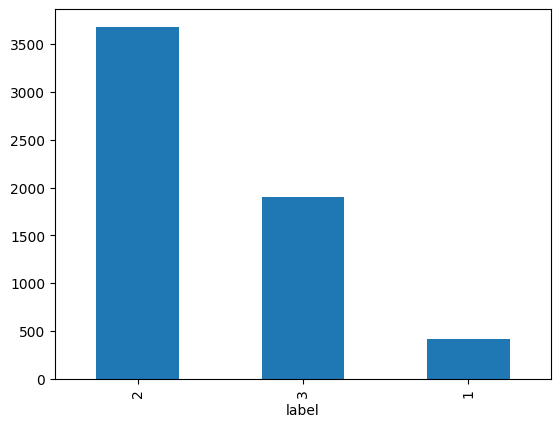

In [57]:
df.label.value_counts().plot(kind = 'bar')

In [69]:
df.replace({'label':{1:0}}, inplace=True)

In [70]:
df.replace({'label':{2:1}}, inplace=True)

In [74]:
df.replace({'label':{3:2}}, inplace=True)#0 = negative tweet 1 = neutral tweet 2 = positive tweet

In [75]:
port_stem = PorterStemmer() #to reduce a word to its root word

In [76]:
def stemming(content):

    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split() #splitting all the sentence words and storing it
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [79]:
df['stemmed_content'] = df['tweet_text'].apply(stemming)

In [80]:
df.head()

,tweet_id,label,tweet_text,stemmed_content
0,1.360340e+18,0,"4,000 a day dying from the so called Covid-19 ...",day die call covid vaccin dailybeast report va...
1,1.382900e+18,1,Pranam message for today manifested in Dhyan b...,pranam messag today manifest dhyan meenapranam...
2,1.375670e+18,1,Hyderabad-based ?@BharatBiotech? has sought fu...,hyderabad base bharatbiotech sought fund gover...
3,1.381310e+18,0,"Confirmation that Chinese #vaccines ""don’t hav...",confirm chines vaccin high protect rate accord...
4,1.362170e+18,2,"Lab studies suggest #Pfizer, #Moderna vaccines...",lab studi suggest pfizer moderna vaccin protec...


In [82]:
print(df['stemmed_content'])

0       day die call covid vaccin dailybeast report va...
1       pranam messag today manifest dhyan meenapranam...
2       hyderabad base bharatbiotech sought fund gover...
3       confirm chines vaccin high protect rate accord...
4       lab studi suggest pfizer moderna vaccin protec...
                              ...                        
5995    swami dr swami jee mani peopl like get covaxin...
5996    happi fulli vaccin covid readi serv vaccineswo...
5997    serum institut india announc cost covishield v...
5998    batshitcrazi barrowfordhead bectulli mine yest...
5999    smart sympathi attend oblong noth educ feedbac...
Name: stemmed_content, Length: 6000, dtype: object


In [83]:
print(df['label'])

0       0
1       1
2       1
3       0
4       2
       ..
5995    1
5996    2
5997    1
5998    0
5999    1
Name: label, Length: 6000, dtype: int64


In [85]:
#separating the data and the label
X = df['stemmed_content'].values
Y = df['label'].values

In [86]:
print(X)

['day die call covid vaccin dailybeast report vaccin pfizervaccin moderna http co p nqwwzpk'
 'pranam messag today manifest dhyan meenapranam truth love karm light natur conscious fridaythought fridaymorn coronavirusindia covid india navratri thane ambedkarjayanti modiji narendramodi secondcovidwav covaxin http co bqnomvowjg'
 'hyderabad base bharatbiotech sought fund govern ramp product indigen develop covid vaccin covaxin compani written dbtindia seek rs crore ramp http co wjwlvigmc'
 ...
 'serum institut india announc cost covishield vaccin vaccin cost rs govt hospit amp rs privat hospit covaxin india covishieldvaccin covid seruminstituteofindia http co gik zrr jh'
 'batshitcrazi barrowfordhead bectulli mine yesterday abl get bed today feel vaccin oxfordastrazeneca'
 'smart sympathi attend oblong noth educ feedback ate ordinari covaxin http co n ogtietdp']


In [87]:
print(Y)

[0 1 1 ... 1 0 1]


In [88]:
#splitting the data to train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [89]:
print(X.shape, X_train.shape, X_test.shape)

(6000,) (4800,) (1200,)


In [90]:
print(X_train)

['johntori embarrass moscow russia everyth open busi usual ontario canada report case covid new case toronto lockdown close busi church famili hope mentalhealth canada get syria sputnikv effect http co aepcvbmhl'
 'nd shot done moderna girl vaccin'
 'thailand use china sinovac covid vaccin kick nation vaccin program aim inocul two third countri elig peopl media report said http co hu qniqc'
 ...
 'unfortun pretti bad sever reaction second covid shot howev live last damag moderna covid vaccin'
 'pfizer biontech produc billion dose covid vaccin via indiatvnew pfizer pfizerbiontech coronavirusvaccin coronaviru http co f yhtfk'
 'justintrudeau hi toronto ontario canada receiv sputnikv vaccin canadian govern doug ford trudeau pretend russian effect vaccin covid lockdown jesu fordnat justintrudeau cpho canada celliott http co dbmlp ra']


In [91]:
print(X_test)

['icmr covaxin neutralis multipl variant sar cov doubl mutant strain dynamitenewscovid awar covaxin icmrdelhi bharatbiotech http co ztegymha p'
 'moderna pfizer covid vaccin may reduc coronaviru transmiss mrna pfe http co z ojgslrb'
 'moscow russia everyth open busi usual ontario canada report case covid new case toronto lockdown close busi church famili hope mentalhealthmatt canada get syria sputnikv effect http co dsh zcyita http co qruecf twp'
 ...
 'understand covaxin freeli avail mumbai trueeven jjhospit reserv seconddos suppli issu distribut issu someth els officeofut mybmc pmoindia vikasreport remanagarajan teensthack rupalije rachesella'
 'think nsitharaman need astrazeneca vaccin shot rememb promis taken covaxin amp forgotten covishield similar forget pmcbankcrisi pmcbankdepositor psb famili pmc bank like step child promis forgotten finminindia http co bg ijmcikq'
 'shot done excit stupidpandem readytogotoabar kerrysellsaz covidvaccin moderna queen creek arizona http co fhufmo

In [92]:
# converting the textual data to numerical data

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [93]:
print(X_train)

  (0, 176)	0.29403758365705
  (0, 2254)	0.05228935283512474
  (0, 5772)	0.05233633994779664
  (0, 3706)	0.1276783279027243
  (0, 12428)	0.09892890763003942
  (0, 12878)	0.17632934853738802
  (0, 4890)	0.11056124888199327
  (0, 8197)	0.19270566679993906
  (0, 5680)	0.1527771232628444
  (0, 4201)	0.16430460765754668
  (0, 2112)	0.1777833234849791
  (0, 2203)	0.18515911238572072
  (0, 7624)	0.1539129821612201
  (0, 13406)	0.16751356066561268
  (0, 8926)	0.14599574503901716
  (0, 2562)	0.06965425044564698
  (0, 1824)	0.31638750166486074
  (0, 11151)	0.15240625752862244
  (0, 1752)	0.3051824347013055
  (0, 9515)	0.16304688608221077
  (0, 13988)	0.19215077775312653
  (0, 1650)	0.3231858222692394
  (0, 9535)	0.1789132961534303
  (0, 4045)	0.18607927613119463
  (0, 11495)	0.1323583619475912
  :	:
  (4799, 10391)	0.28387597245089524
  (4799, 5553)	0.24338732374808858
  (4799, 1922)	0.2259672366932975
  (4799, 2645)	0.23526497190938964
  (4799, 10877)	0.254261931738111
  (4799, 6819)	0.401956281

In [94]:
print(X_test)

  (0, 14193)	0.22528468376411453
  (0, 12602)	0.2700318702431583
  (0, 11661)	0.28415464330354023
  (0, 8921)	0.30458777574699775
  (0, 8657)	0.2794475697274882
  (0, 8632)	0.2932517676669751
  (0, 5905)	0.30208736651439394
  (0, 5904)	0.2794475697274882
  (0, 5772)	0.06659496197345542
  (0, 3400)	0.27517564494431396
  (0, 2553)	0.23834017674261995
  (0, 2549)	0.2765562341983262
  (0, 2254)	0.06653517359343593
  (0, 1185)	0.20354875233814673
  (0, 849)	0.3317707374230893
  (1, 14067)	0.0926736734742435
  (1, 13463)	0.4818216554778031
  (1, 11065)	0.42505088598595964
  (1, 10028)	0.19587748707791328
  (1, 10024)	0.4818216554778031
  (1, 8585)	0.3123219014784117
  (1, 8440)	0.12921317275880417
  (1, 8085)	0.32516106385270943
  (1, 5772)	0.09213339336964936
  (1, 2562)	0.12262000863220553
  :	:
  (1198, 10196)	0.2751348449564427
  (1198, 9227)	0.2751348449564427
  (1198, 8881)	0.14988059281355384
  (1198, 7518)	0.13688855468022054
  (1198, 5772)	0.04729021304796385
  (1198, 4551)	0.239056

In [121]:
#training the machine learning model using logistic regression
model = LogisticRegression(max_iter=1000, C=1.0, penalty='l2')

In [122]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [123]:
#model evaluation
#accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [124]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X_train, Y_train, cv=6)  # Adjust the number of folds as needed
print("Cross-validation scores:", scores)

Cross-validation scores: [0.84328358 0.86567164 0.87969925 0.84962406 0.86466165 0.87218045]


In [125]:
print('Accuracy score on the training data:', training_data_accuracy)

Accuracy score on the training data: 0.8825


In [126]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [127]:
print('Accuracy score on the test data:', test_data_accuracy) #no overfitting

Accuracy score on the test data: 0.855


In [128]:
#saving the trained model
import pickle 

In [129]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [141]:
#using the saved model for future predictions
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [148]:
X_new = X_test[[100]] #printing the 100th data point
print('actual value =', Y_test[[100]])

prediction = model.predict(X_new)
print('prediction =', prediction)

if(prediction[0] == 0):
    print('Negative Tweet')
elif(prediction[0] == 1):
    print('Neutral Tweet')
else:
    print('Positive Tweet')

actual value = [1]
prediction = [1]
Neutral Tweet


In [149]:
X_new = X_test[[105]] 
print('actual value =', Y_test[[105]])

prediction = model.predict(X_new)
print('prediction =', prediction)

if(prediction[0] == 0):
    print('Negative Tweet')
elif(prediction[0] == 1):
    print('Neutral Tweet')
else:
    print('Positive Tweet')

actual value = [0]
prediction = [0]
Negative Tweet


In [269]:
import joblib

In [282]:
joblib.dump(model, './covid19MLmodel-Copy1')

['./covid19MLmodel-Copy1']

In [276]:
Y_pred= model.predict(X_test)
comp= pd.DataFrame(Y_test)
comp['pred']= Y_pred
comp

,0,pred
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
195,1,1
196,1,1
197,1,1
198,0,0


In [287]:
import gradio as gr

def greet(datapoint):
    model1 = pickle.load(open('trained_model.sav', 'rb'))
    pred = model1.predict(datapoint)
    if pred == 0:
        return 'Negative Tweet'
    elif pred == 1:
        return 'Neutral Tweet'
    elif pred == 2:
        return 'Positive Tweet'

demo = gr.Interface(fn=greet, inputs=["number"], outputs="text")
demo.launch()

Running on local URL:  http://127.0.0.1:7892

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\AISHWARYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\AISHWARYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\AISHWARYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\blocks.py", line 1522, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\AISHWARYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\AISHWARYA\AppData\Local\Programs\Python\